<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yassaee</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Parham Gilani

**Student ID**: 400101859

# Logistic Regression

Logistic regression is a **supervised machine learning algorithm** primarily used for **binary classification tasks**. It predicts the probability of an outcome belonging to one of two classes (0 or 1) using a logistic function, specifically the **sigmoid function**, which maps any real-valued number into the range [0, 1].

### Key Features:
- **Binary Outcomes**: Logistic regression is suitable when the dependent variable is binary, such as yes/no or pass/fail.
- **Maximum Likelihood Estimation (MLE)**: Coefficients are estimated using MLE to maximize the likelihood of the observed data.
- **Interpretation**: The output can be interpreted as odds ratios, indicating how changes in independent variables affect the likelihood of an event.

### Types:
1. **Binary Logistic Regression**: Two possible outcomes.
2. **Multinomial Logistic Regression**: More than two categories.
3. **Ordinal Logistic Regression**: Ordered categories.

Logistic regression is widely used in fields like finance, healthcare, and social sciences for tasks such as risk assessment and disease diagnosis.

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

In [2]:
# import necessary libraries

class MyLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initialize the logistic regression model.

        Parameters:
        - learning_rate: The step size for gradient descent.
        - num_iterations: The number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Apply the sigmoid function element-wise.

        Parameters:
        - z: Input array (n_samples,).

        Returns:
        - The sigmoid of z.
        """
        return 1 / (1 + np.exp(-z))

    # TODO: Implement a loss function for logistic regression, using binary cross-entropy as the loss metric.
    def loss(self, y_true, y_pred):
        """
        Compute binary cross-entropy loss.

        Parameters:
        - y_true: Ground truth labels (n_samples,).
        - y_pred: Predicted probabilities (n_samples,).

        Returns:
        - The binary cross-entropy loss.
        """
        m = y_true.shape[0]
        epsilon = 1e-15  # To avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.

        Parameters:
        - X: Input features (n_samples, n_features).
        - y: Ground truth labels (n_samples,).
        """
        m, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Compute linear model output
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / m
            db = np.sum(y_pred - y) / m

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Apply a sigmoid function and set a threshold (e.g., 0.5) to determine the binary outcome.
    def predict(self, X):
        """
        Predict binary labels for given input features.

        Parameters:
        - X: Input features (n_samples, n_features).

        Returns:
        - Binary predictions (0 or 1) for each sample.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [3]:

# TODO: Load the dataset from Logistic_question.csv.
# Make sure to import necessary libraries for loading and handling CSV data (e.g., pandas, numpy).
data = pd.read_csv("Logistic_question.csv")

# TODO: Make the 'Target' column binary if necessary.
# For example, you could map specific values to 0 and 1 based on conditions.
data['Target'] = data['Target'].map(lambda x : 1 if x > 0.5 else 0)

# TODO: Split the data into features (X) and target (y).
# Then, split the data into training and testing sets with an 80-20 split.
X = data.drop(columns=['Target']).to_numpy()
y = data['Target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TODO: Create an instance of MyLogisticRegression.
# Fit the model on the training set (X_train, y_train).
model = MyLogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# TODO: Predict the target values on the test set (X_test).
y_pred = model.predict(X_test)

# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision, recall, and F1-score.
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.9375
Precision: 0.9333
Recall: 1.0000
F1-Score: 0.9655


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**
1. **Accuracy**: Measures the ratio of correct predictions to total instances; ideal for balanced datasets but misleading with imbalanced data.  
2. **Precision**: Focuses on minimizing false positives, critical in tasks like spam or fraud detection.  
3. **Recall**: Prioritizes minimizing false negatives, essential in fields like medical diagnosis or safety-critical systems.  
4. **F1-Score**: Balances precision and recall, valuable for imbalanced datasets to provide a comprehensive performance measure.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [4]:
# TODO: Create an instance of LogisticRegression from scikit-learn.
sklearn_model = LogisticRegression()

# TODO: Fit the built-in Logistic Regression model on the training set (X_train, y_train).
sklearn_model.fit(X_train, y_train)

# TODO: Use the trained model to predict on the test set (X_test).
sklearn_predictions = sklearn_model.predict(X_test)

# TODO: Calculate and print the same evaluation metrics as before (e.g., accuracy, precision, recall, F1-score)
# to compare the performance of the custom model with the built-in Logistic Regression.
accuracy = accuracy_score(y_test, sklearn_predictions)
precision = precision_score(y_test, sklearn_predictions)
recall = recall_score(y_test, sklearn_predictions)
f1 = f1_score(y_test, sklearn_predictions)

print("Evaluation Metrics for Scikit-learn Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Evaluation Metrics for Scikit-learn Logistic Regression:
Accuracy: 0.9500
Precision: 0.9459
Recall: 1.0000
F1-Score: 0.9722


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
The scikit-learn `LogisticRegression` outperforms custom models due to its optimized implementation, ensuring computational efficiency and numerical stability. Key parameters include:  
1. **`penalty`**: Adds regularization (default L2) to prevent overfitting.  
2. **`C`**: Controls regularization strength, with smaller values enforcing stronger regularization.  
3. **`solver`**: Specifies the optimization algorithm, tailored for different dataset types and sizes.  

These features enable faster convergence and more reliable performance.

# Multinomial Logistic Regression

Multinomial logistic regression is a statistical method used for **classifying outcomes** when the dependent variable has **more than two categories**. Unlike binary logistic regression, which handles only two possible outcomes, multinomial logistic regression can predict the probabilities of multiple discrete outcomes based on one or more independent variables, which can be continuous or categorical.

### Key Features:
- **Generalization of Logistic Regression**: It extends the binary logistic model to handle multiclass problems, making it suitable for scenarios like predicting consumer preferences or classifying types of jobs.
- **Probability Estimation**: The model estimates the probability of each category by calculating a score for each potential outcome and applying the softmax function to convert these scores into probabilities.
- **Modeling Approach**: It can be conceptualized as running multiple binary logistic regressions, where one category is treated as a reference (or pivot) against which others are compared.

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [5]:
class MyMultinomialLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    # Remember that, for multinomial logistic regression, weights will be a matrix with shape (n_features, n_classes).
    def __init__(self, learning_rate=0.01, num_iterations=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.n_classes = n_classes
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # TODO: Implement a loss function for multinomial logistic regression, using categorical cross-entropy as the loss metric.
    # This will calculate the average log loss across all classes for a given set of predictions.
    def loss(self, y_true, y_pred):
        m = y_true.shape[0]
        epsilon = 1e-15  # Avoid log(0) issues
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        log_likelihood = -np.sum(y_true * np.log(y_pred))
        return log_likelihood / m

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        m, n_features = X.shape
        self.n_classes = self.n_classes or len(np.unique(y))

        # Initialize weights and bias
        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros((1, self.n_classes))

        # One-hot encode the target labels
        y_one_hot = np.zeros((m, self.n_classes))
        y_one_hot[np.arange(m), y] = 1

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(linear_model)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y_one_hot)) / m
            db = np.sum(y_pred - y_one_hot, axis=0, keepdims=True) / m

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Use the softmax function to generate probabilities for each class, and assign each sample to the class with the highest probability.
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        return np.argmax(y_pred, axis=1)  # Return class with highest probability

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.


Quantization Level 2 :
My Logistic Regression Accuracy: 0.88
My Logistic Regression Precision: 0.87
My Logistic Regression Recall: 0.84
My Logistic Regression F1 Score: 0.85

Quantization Level 3 :
My Logistic Regression Accuracy: 0.79
My Logistic Regression Precision: 0.71
My Logistic Regression Recall: 0.64
My Logistic Regression F1 Score: 0.62

Quantization Level 4 :
My Logistic Regression Accuracy: 0.85
My Logistic Regression Precision: 0.88
My Logistic Regression Recall: 0.78
My Logistic Regression F1 Score: 0.78

Quantization Level 5 :
My Logistic Regression Accuracy: 0.64
My Logistic Regression Precision: 0.69
My Logistic Regression Recall: 0.54
My Logistic Regression F1 Score: 0.50

Quantization Level 6 :
My Logistic Regression Accuracy: 0.86
My Logistic Regression Precision: 0.88
My Logistic Regression Recall: 0.78
My Logistic Regression F1 Score: 0.73

Quantization Level 7 :
My Logistic Regression Accuracy: 0.70
My Logistic Regression Precision: 0.74
My Logistic Regression R

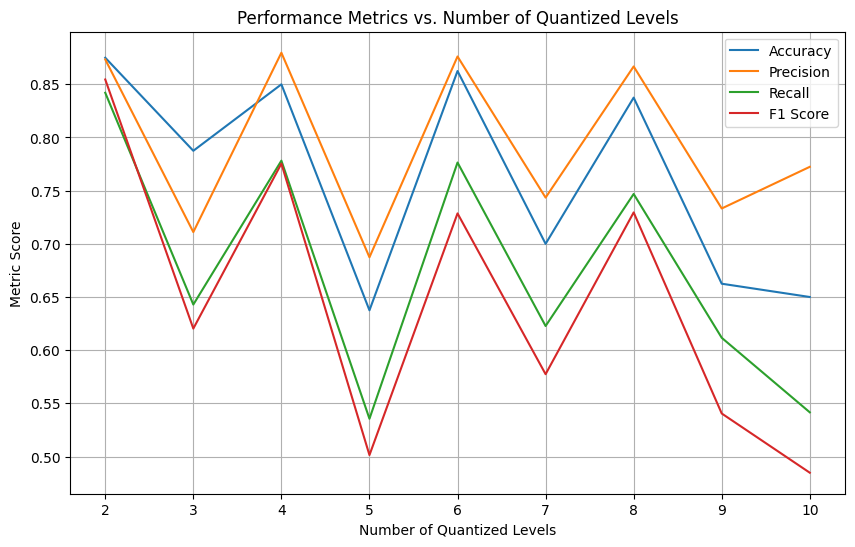

In [6]:
# TODO: Load the dataset
data = pd.read_csv('Logistic_question.csv')

# Initialize lists to store evaluation metrics for different quantization levels
accuracies = []
precisions = []
recalls = []
f1_scores = []

# TODO: Quantize the 'Target' column into `i` levels, where `i` ranges from 2 to 10
for i in range(2, 11):
    print(f"\nQuantization Level {i} :")

    # Quantize the target column
    data[f'quantized_target_{i}'] = pd.cut(data['Target'], bins=i, labels=range(i))

    # Split the data into features (X) and quantized target (y)
    X = data.drop(['Target', f'quantized_target_{i}'], axis=1).to_numpy()
    y = data[f'quantized_target_{i}'].astype(int).to_numpy()

    # Split the data into training and testing sets with an 80-20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the training data and use the same scaling parameters to normalize X_test
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TODO: Create an instance of MyMultinomialLogisticRegression
    model = MyMultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, n_classes=i)

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # TODO: Predict the target values on the test set
    y_pred = model.predict(X_test)

    # TODO: Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    precisions.append(precision)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    recalls.append(recall)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    f1_scores.append(f1)

    print(f"My Logistic Regression Accuracy: {accuracy:.2f}")
    print(f"My Logistic Regression Precision: {precision:.2f}")
    print(f"My Logistic Regression Recall: {recall:.2f}")
    print(f"My Logistic Regression F1 Score: {f1:.2f}")

# Visualize performance metrics across quantization levels
fig = plt.figure(figsize=(10, 6))

plt.plot(range(2, 11), accuracies, label='Accuracy')
plt.plot(range(2, 11), precisions, label='Precision')
plt.plot(range(2, 11), recalls, label='Recall')
plt.plot(range(2, 11), f1_scores, label='F1 Score')

plt.xlabel('Number of Quantized Levels')
plt.ylabel('Metric Score')
plt.title('Performance Metrics vs. Number of Quantized Levels')
plt.legend()
plt.grid(True)
plt.show()

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:** For this dataset, i = 2 yields the best results, showing consistent and balanced accuracy, precision, recall, and F1-score. However, the optimal value of **i** depends on the data and task. The significance of each metric varies: precision is critical when false positives are costly, while accuracy may be prioritized for balanced performance across all classes.

# Going a little further!(bonus*)

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [7]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.

In [8]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 95.2MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [7]:

# TODO: Import the pandas library to handle data manipulation and analysis.

# TODO: Load the dataset into a pandas DataFrame.
data = pd.read_csv('adult.csv')

# TODO: Check for null entries in each column using the .isnull().sum() method.
# This will give the number of null entries for each column.
data = data.replace('?', np.nan)
print(data.isnull().sum())

# TODO: Calculate the total number of null entries in the dataset by summing the null values across all columns.
print('Total number of null datas: ',data.isnull().sum().sum())

# TODO: Print the number of null entries per column and the total number of null entries in the dataset.

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
Total number of null datas:  6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

Missing data in datasets is a common challenge, and handling it is essential for building effective machine learning models. Five common methods to address null values include:

1. **Removing Rows or Columns:** Suitable when null values are few, minimizing data loss.
2. **Imputation with Mean, Median, or Mode:** Effective for random missing data but can distort distributions if many values are missing.
3. **Predictive Imputation:** Uses models like regression or KNN to estimate missing values, offering accuracy but requiring computational effort.
4. **Special Value Replacement:** Assigns placeholders like "Unknown" or -1, preserving data but potentially introducing bias if the missingness is systematic.
5. **Algorithms Handling Missing Data:** Models like decision trees can natively work with missing entries, avoiding preprocessing but with varying effectiveness.

The method chosen depends on the nature and extent of missing data. Proper validation and experimentation are crucial to ensure model performance and data integrity.

**Task:** Handle null entries using your best method.

In [8]:

# TODO: Determine the best method for handling null entries.
# Options include:
# - Dropping rows with null values using .dropna() if they are few in number.
# - Filling null values with a specific value (e.g., mean, median, or mode) using .fillna().
# - Consider more sophisticated methods, such as interpolation or model-based imputation, if appropriate.
data_cleaned = data.fillna(data.mode().iloc[0])

# TODO: Implement the chosen method to handle null entries in the dataset.
# For example, if dropping rows, use:
# data_cleaned = data.dropna()

# TODO: If filling null values, decide on the strategy (mean, median, mode) for each relevant column.
# For example:
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# TODO: After handling null entries, verify that there are no more null values in the dataset.
# This can be done using the .isnull().sum() method again.

# TODO: Print the results to confirm that null entries have been handled successfully.
print(data_cleaned.isnull().sum().sum())

0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [9]:
# TODO: Convert categorical features to numerical values using appropriate encoding methods.
# Options include one-hot encoding with pd.get_dummies() or label encoding using sklearn's LabelEncoder.
data_cleaned['income'] = data_cleaned['income'].map(lambda x : 1 if x == '>50K' else 0)
label_encoder = LabelEncoder()
new_data = data_cleaned.copy()
for column in data_cleaned.columns:
    if new_data[column].dtype == 'object' and column != 'income':
        new_data[column] = label_encoder.fit_transform(data_cleaned[column])

# TODO: Split the dataset into features (X) and target (y).
# For example, set X to all columns except the target and y to the target column.
X = new_data.drop('income', axis=1)
y = new_data['income']

# TODO: Use train_test_split from sklearn to split the dataset into training and testing sets with an 80-20 ratio.
# Set random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the features using a method such as StandardScaler or MinMaxScaler.
# Fit the scaler on X_train and transform both X_train and X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TODO: Import the LogisticRegression model and GridSearchCV from sklearn.
# Create an instance of LogisticRegression and specify the parameters you want to tune.
log_reg = LogisticRegression()

# TODO: Define a parameter grid for GridSearchCV to search over.
# This should include hyperparameters such as 'C' (regularization strength), 'solver', etc.
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# TODO: Fit the GridSearchCV to the training data (X_train, y_train).
# Ensure you specify the scoring metric you want to optimize (e.g., accuracy).
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# TODO: Retrieve the best model and its parameters from GridSearchCV.
# Print the best parameters found by GridSearchCV.
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# TODO: Evaluate the best model on the training set and the test set.
# Calculate and print the training and testing accuracy.
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# TODO: Print the results to summarize the model performance.
y_pred = best_model.predict(X_test)
print("\n",classification_report(y_test, y_pred))

Best Parameters:  {'C': 0.1, 'solver': 'liblinear'}
Training Accuracy: 0.82
Testing Accuracy: 0.83

               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [10]:
# TODO: Set the value of i to 10 for splitting the training data into parts.
i = 10
# TODO: Split X_train into i parts. You can use numpy's array_split function or similar methods.
# This will create a list of subsets of X_train and the corresponding subsets of y_train.
X_parts = np.array_split(X_train, i)
y_parts = np.array_split(y_train, i)

# TODO: Initialize a list to store the models trained on each part of the data.
models = []

# TODO: For each part (subset) of the training data:
#       - Create an instance of your custom MyLogisticRegression model.
#       - Fit the model on the subset (X_part, y_part).
#       - Store the trained model in the list of models.
for X_part, y_part in zip(X_parts, y_parts):
    model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_part, y_part)
    models.append(model)

# TODO: Define the three ensemble methods you want to implement.
def bagging(models, X):
    predictions = np.zeros((len(models), X.shape[0]))
    for idx, model in enumerate(models):
        predictions[idx] = model.predict(X).flatten()
    return np.round(np.mean(predictions, axis=0))

def boosting(models, X):
    final_prediction = np.zeros(X.shape[0])
    for model in models:
        final_prediction += model.predict(X).flatten()
    return np.sign(final_prediction)

def stacking(models, X_train, y_train, X_test):
    base_predictions = np.array([model.predict(X_train) for model in models]).T  # Shape: (n_samples, n_models)
    base_predictions = base_predictions.reshape(X_train.shape[0], -1)  # Shape: (n_samples, n_models)
    final_model = LogisticRegression()
    final_model.fit(base_predictions, y_train)
    base_predictions_test = np.array([model.predict(X_test) for model in models]).T
    base_predictions_test = base_predictions_test.reshape(X_test.shape[0], -1)
    return final_model.predict(base_predictions_test)

# TODO: Evaluate and compare the test accuracy of each ensemble method on X_test.
# Print the test accuracy for each ensemble method.
bagging_predictions = bagging(models, X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

boosting_predictions = boosting(models, X_test)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

stacking_predictions = stacking(models, X_train, y_train, X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print(f"Bagging Test Accuracy: {bagging_accuracy}")
print(f"Boosting Test Accuracy: {boosting_accuracy}")
print(f"Stacking Test Accuracy: {stacking_accuracy}")

# TODO: Based on the results, determine which ensemble method performed the best on the test set.
best_method = max(
    [('Bagging', bagging_accuracy),
     ('Boosting', boosting_accuracy),
     ('Stacking', stacking_accuracy)],
    key=lambda x: x[1]
)

print(f"The best ensemble method is {best_method[0]} with an accuracy of {best_method[1]}")

Bagging Test Accuracy: 0.8213737332377931
Boosting Test Accuracy: 0.8211690039922203
Stacking Test Accuracy: 0.8215784624833657
The best ensemble method is Stacking with an accuracy of 0.8215784624833657


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

1. **Bagging (Bootstrap Aggregating):** Trains multiple models independently on random subsets of data. Predictions are averaged for regression or majority-voted for classification, reducing variance and preventing overfitting.

2. **Boosting:** Trains models sequentially, where each model focuses on correcting the errors of the previous ones. Predictions are weighted, emphasizing better-performing models, to reduce bias and improve accuracy.

3. **Stacking:** Combines multiple models by using their predictions as inputs to a final meta-model. This approach leverages the strengths of diverse models for improved predictive performance.

The most suitable method is determined based on accuracy on the test set.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

The best value of i is 28 with a training accuracy of 0.8163693599160545 and a test accuracy of 0.8234210256935203


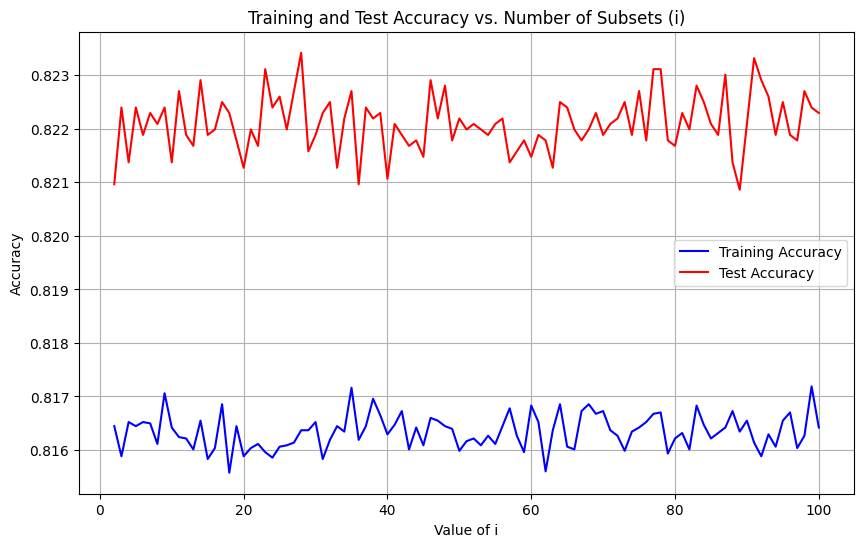

In [11]:
# TODO: Initialize lists to store the values of i, training accuracies, and testing accuracies.
i_values = []
training_accuracies = []
test_accuracies = []
# TODO: Create a loop to iterate over the range of i from 2 to 100:
for i in range(2, 101):
    X_parts = np.array_split(X_train, i)
    y_parts = np.array_split(y_train, i)
    
    models = []
    
    for X_part, y_part in zip(X_parts, y_parts):
        model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
        model.fit(X_part, y_part)
        models.append(model)
    
    train_predictions = np.round(np.mean([model.predict(X_train) for model in models], axis=0))
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    test_predictions = np.round(np.mean([model.predict(X_test) for model in models], axis=0))
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    i_values.append(i)
    training_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# TODO: After the loop, determine the best value of i based on the test accuracy.
best_i = i_values[np.argmax(test_accuracies)]
best_train_accuracy = training_accuracies[np.argmax(test_accuracies)]
best_test_accuracy = test_accuracies[np.argmax(test_accuracies)]

# TODO: Print the best value of i, along with the corresponding training and test accuracy of the best model.
print(f"The best value of i is {best_i} with a training accuracy of {best_train_accuracy} and a test accuracy of {best_test_accuracy}")

# TODO: Plot the training and testing accuracies against i.
# Use a line plot to visualize the performance as i changes from 2 to 100.
# Make sure to label the axes and provide a title for the plot.
plt.figure(figsize=(10, 6))
plt.plot(i_values, training_accuracies, label='Training Accuracy', color='blue')
plt.plot(i_values, test_accuracies, label='Test Accuracy', color='red')
plt.xlabel('Value of i')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Number of Subsets (i)')
plt.legend()
plt.grid(True)
plt.show() 

**Question:** Analyze the results.

**Your Answer:**

Test accuracy increases with larger values of *i* (more splits/iterations), but the improvement is non-linear. This suggests the model benefits from learning from diverse data subsets, enhancing generalization. However, the diminishing rate of improvement at higher *i* values indicates diminishing returns, emphasizing that while increasing *i* can help, its impact lessens with more splits.